In [1]:
import numpy as np
import pandas as pd

In [2]:
ds=pd.read_csv("C:/Users/HP/Desktop/DERSLER/diabetes.csv")
ds.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df=pd.DataFrame(ds)

In [4]:
x=df.drop("Outcome",axis=1) #bağımsız değişken
y=df["Outcome"] #sonuç değişkeni 

In [5]:
#handling missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
columns_to_impute = df.columns[:-1]
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [6]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler  #ortalama=0 std.sapma=1  olacak şekilde veri normailzasyonu yapar.
st_x= StandardScaler()  
x_train2= st_x.fit_transform(x_train)
x_test2= st_x.transform(x_test) 

In [8]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [9]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [10]:
y_pred = classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [11]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.734375

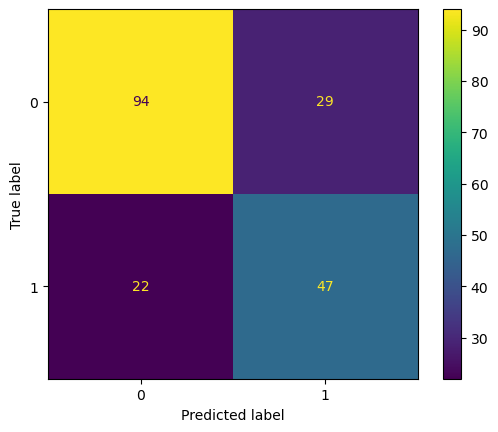

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()

In [14]:
classifier_normalized = GaussianNB()  
classifier_normalized.fit(x_train2, y_train) 

GaussianNB()

In [15]:
y_pred_normalized = classifier.predict(x_test2) 
y_pred_normalized

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
accuracy2 = accuracy_score(y_test, y_pred_normalized)
accuracy2

0.6614583333333334

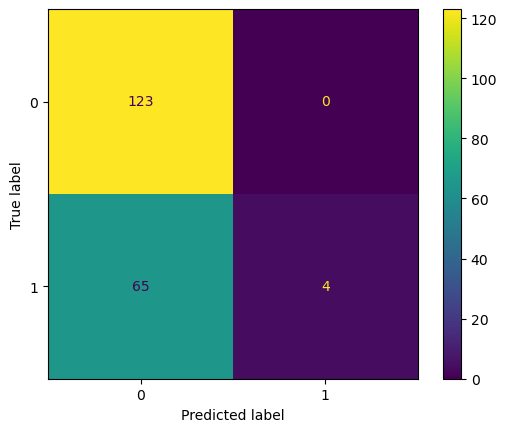

In [37]:
cm2 = confusion_matrix(y_test, y_pred_normalized)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [24]:
?df

In [45]:
params = {'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), params, verbose=3, cv=5)

In [47]:
grid_search.fit(x_train2, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.707 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.733 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.748 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.696 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.791 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.739 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.757 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.635 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.730 total time=   0.0s
[CV 1/5] END .......C=1, gam

[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.809 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.730 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.783 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.793 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.757 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.809 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.713 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.765 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.655 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.652 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.652 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.652 total time=   0.0s
[CV 5/5] END ....C=10, gamma

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [49]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [50]:
y_pred_grid=grid_search.predict(x_test2)
accuracy3=accuracy_score(y_test,y_pred_grid)
accuracy3

0.734375

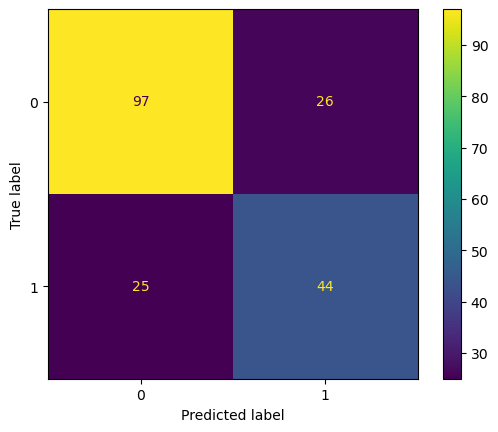

In [51]:
cm3 = confusion_matrix(y_test, y_pred_grid)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm3)
cm_display.plot()